# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
    
Put your answer here. Please don't delete the two HTML tags on either end of this paragraph. It's to make your answer blue so the TAs can easily spot it.

</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
Put your answer here. Please don't delete the two HTML tags on either end of this paragraph. It's to make your answer blue so the TAs can easily spot it.

</font>

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

<font color="blue">Insert your image in this cell. Feel free to remove this prompt from this cell.</font>

### Step 2a: Building
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">
    
Put your answer here. Please don't delete the two HTML tags on either end of this paragraph. It's to make your answer blue so the TAs can easily spot it.

</font>

#### Design data definitions

In [1]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
import matplotlib.pyplot as plt

##################
# Data Definitions
CanadianCpi = NamedTuple('CanadianCpi',[('product_group',str),
                                       ('month',int), # in range[1,12]
                                       ('year',int), # in range[2013,2023]
                                       ('cpi',float)])

# interp. The Canadian CPI data recorded by Stat Canada, with product groups, month, year, and CPI in each observation

CC1 = CanadianCpi('All-items', 1, 2013, 121.3)
CC2 = CanadianCpi('Food', 5, 2016, 143.3)
CC3 = CanadianCpi('All-items', 2, 2013, 122.7)
CC4 = CanadianCpi('All-items', 3, 2013, 122.9)

@typecheck
def fn_for_canadian_cpi(cc:CanadianCpi)->...: #template based on Compound and reference rule
    return (cc.product_group,
            cc.month,
            cc.year,
            cc.cpi)

#List[CanadianCpi]
# interp. a list of CanadianCpi

LOCC0 = []
LOCC1 = [CC1]
LOCC2 = [CC1, CC2]
LOCC3 = [CC1, CC3, CC4]
LOCC4 = [CC1, CC2, CC3, CC4]
LOCC5 = [CC1, CC3]

@typecheck
def fn_for_locc(locc: List[CanadianCpi]) -> ...: # template based on Arbitrary-sized and reference rule
    # description of acc
    acc = ... # type: ...
    for cc in locc:
        acc = ... (fn_for_canadian_cpi(cc),acc)

    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

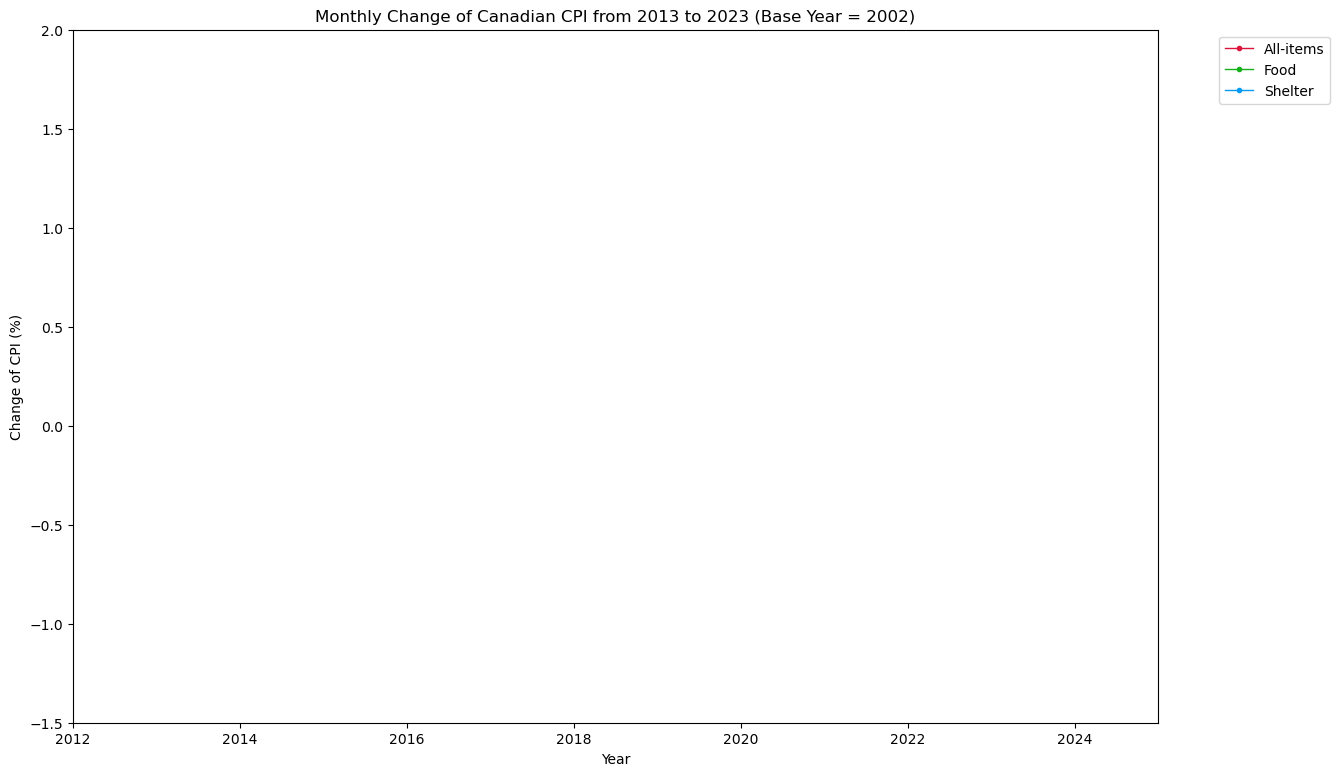

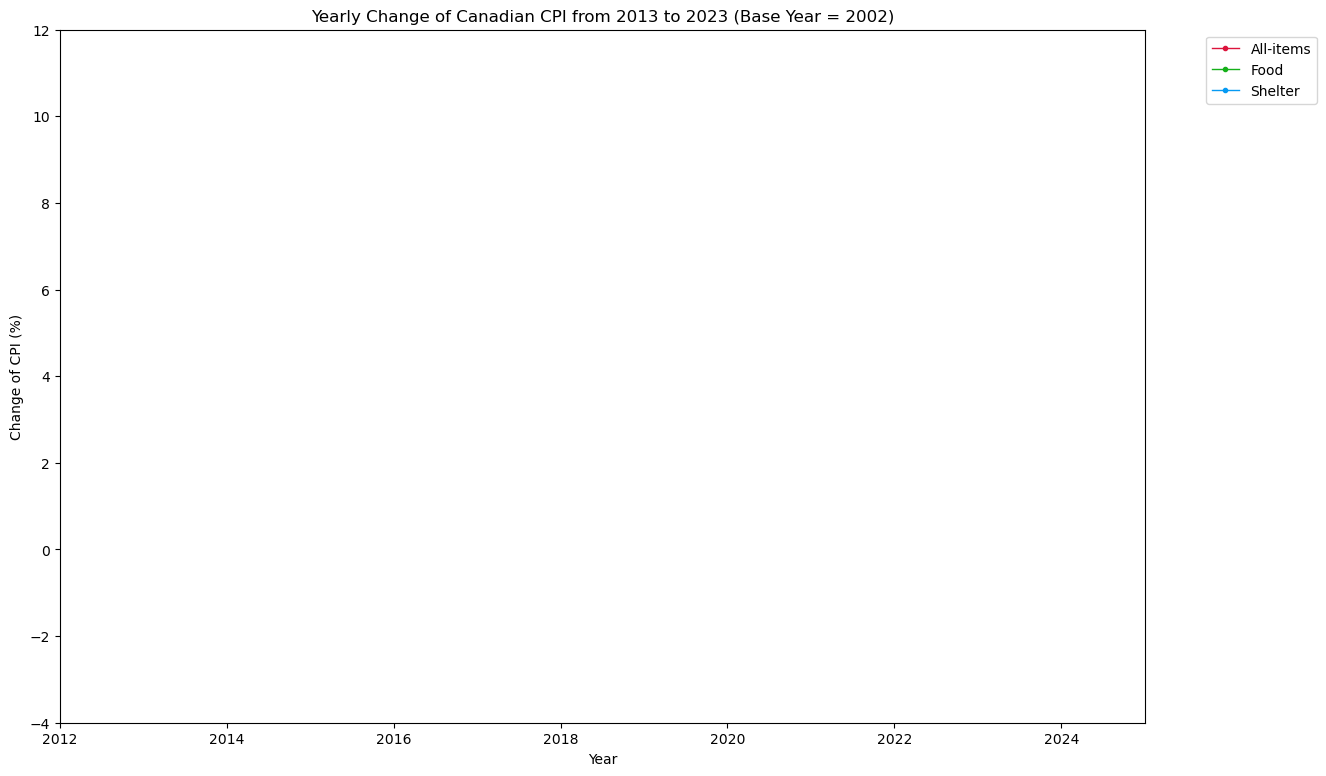

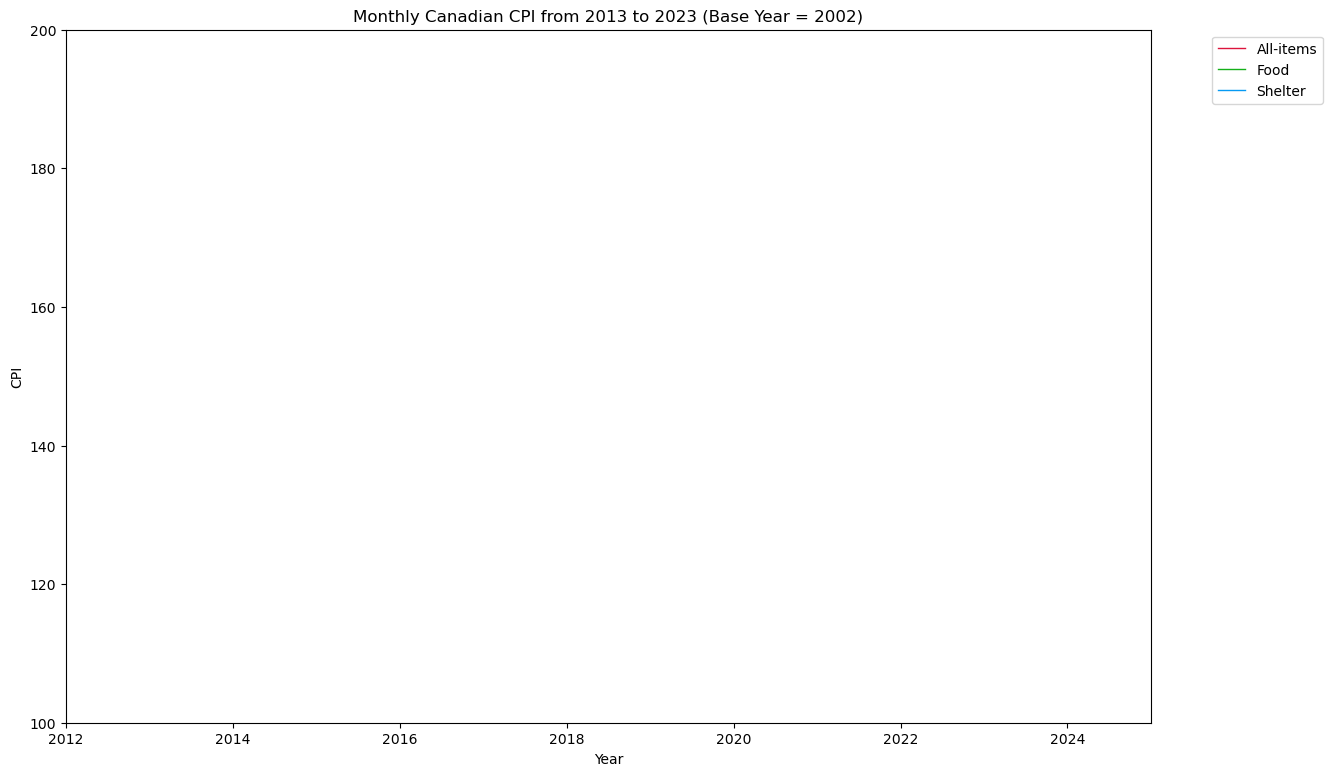

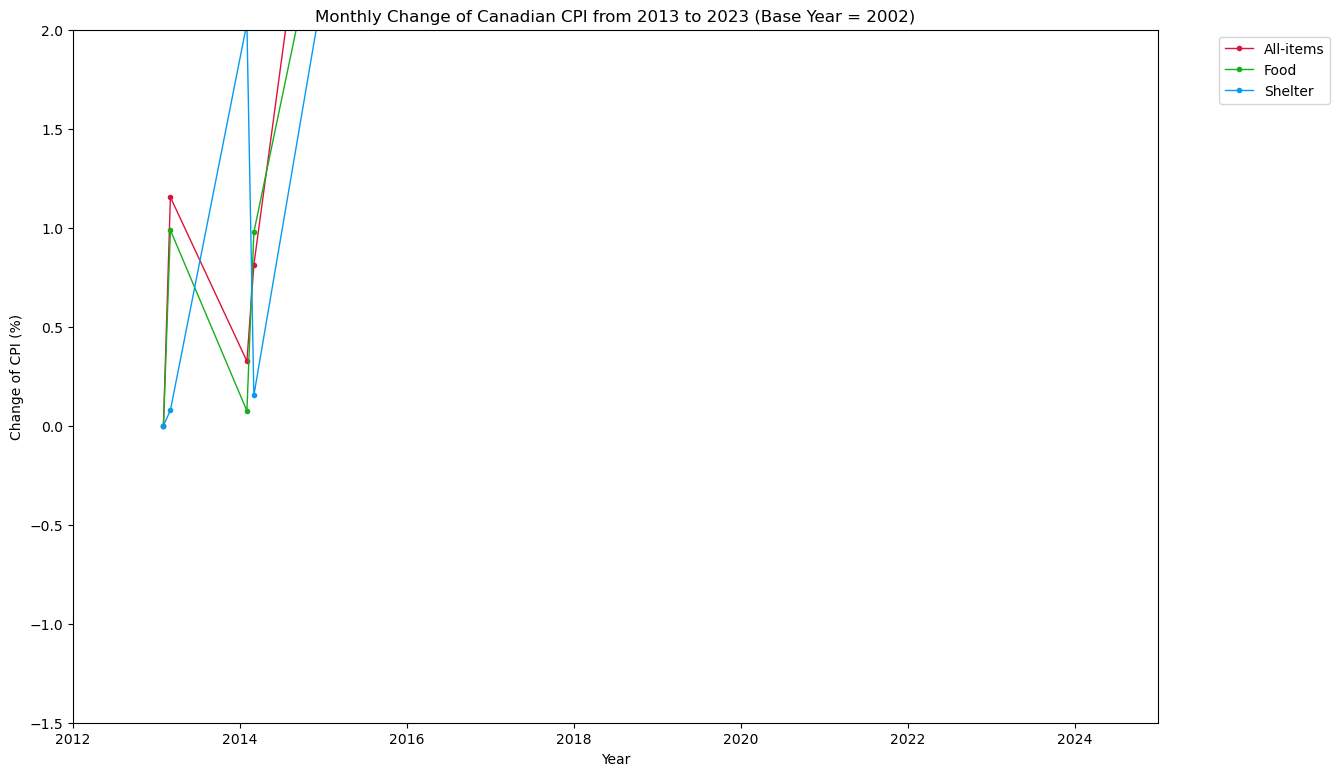

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

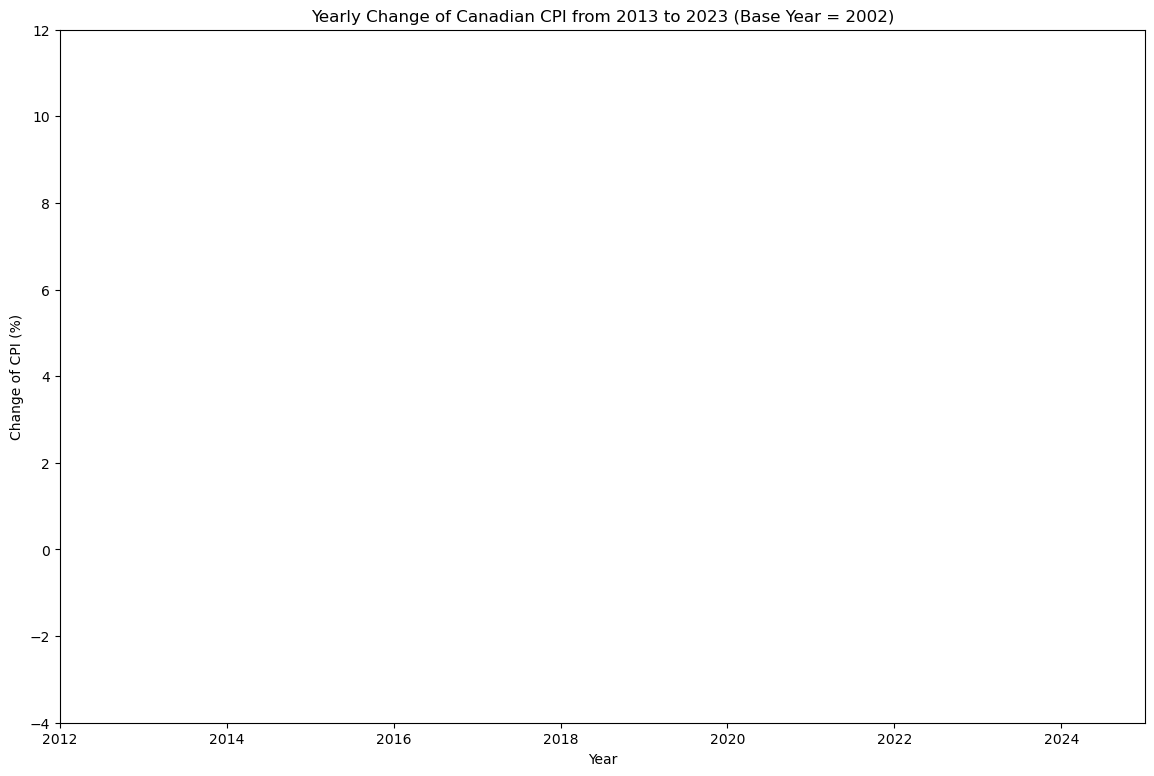

In [35]:
###########
# Functions

@typecheck
def main(filename:str)->None:
    """
    Given a filename, then:
    1) read and store the data as a list of CanadianCpi, 
    2) compute the monthly change and return a list showing the rate of monthly changes for each product group
    3) output a list of exact year
    4) plotting all the lines showing the monthly and yearly rate of cpi change of different product groups in a line plot
    """
    # template from HtDAP, and function composition
    return plot_data(read(filename))

@typecheck
def read(filename: str) -> List[CanadianCpi]:
    """    
    reads information from the specified file and returns a list of CanadianCpi
    """
    #return []  #stub
    # Template from HtDAP and reference rule
    # loc contains the result so far
    locc = [] # type: List[CanadianCpi]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            parse_month = split_month(row[1])
            parse_year = split_year(row[1])
            cc = CanadianCpi(row[0], parse_month, parse_year, parse_float(row[2]))
            locc.append(cc)
    
    return locc

@typecheck
def plot_data(locc: List[CanadianCpi])->None:
    """
    Given a list of CanadianCpi, then:
    1) group the data by their product groups
    2) compute the change per month based on different product groups
    3) return a list of MonthlyChange
    """
    # return None # stub
    # template based on composition
    years = get_time(group_by_product(locc, "All-items"))
    year_list = get_year(locc)
    
    all_change = list_cpi_change(group_by_product(locc, "All-items"))
    food_change = list_cpi_change(group_by_product(locc, "Food"))
    shelter_change = list_cpi_change(group_by_product(locc, "Shelter"))

    all_yearly = list_yearly_change(group_by_product(locc, "All-items"))
    food_yearly = list_yearly_change(group_by_product(locc, "Food"))
    shelter_yearly = list_yearly_change(group_by_product(locc, "Shelter"))
    
    all_cpi = get_cpi(group_by_product(locc, "All-items"))
    food_cpi = get_cpi(group_by_product(locc, "Food"))
    shelter_cpi = get_cpi(group_by_product(locc, "Shelter"))

    create_cpi_change_chart(years,all_change,food_change,shelter_change) 
    create_yearly_change_chart(year_list, all_yearly, food_yearly, shelter_yearly)
    create_cpi_plot(years, all_cpi, food_cpi, shelter_cpi)

    return None

@typecheck
def split_month(time:str)->int:
    """
    Given a time in the format "MMM-YY", split out month and return it as an int
    """
    # return 0 # stub
    # template based on Composition
    string_split = time.split("-")
    month = string_split[0]
    return month_parse_int(month)

@typecheck
def month_parse_int(month:str)->int:
    """
    Given one month in str, return its corresponding int number 
    """
    # return 0 # stub
    # template based on Simple-Atomic
    if month == "Jan":
        return 1
    elif month == "Feb":
        return 2
    elif month =="Mar":
        return 3
    elif month =="Apr":
        return 4
    elif month =="May":
        return 5
    elif month =="Jun":
        return 6
    elif month =="Jul":
        return 7
    elif month =="Aug":
        return 8
    elif month =="Sep":
        return 9
    elif month =="Oct":
        return 10
    elif month =="Nov":
        return 11
    elif month =="Dec":
        return 12  

@typecheck
def split_year(time:str)->int:
    """
    Given a time in the format "MMM-YY", split out the year and return it as an int
    """
    # return 0 # stub
    # template from Atomic Non-Distinct
    string_split = time.split("-")
    return parse_int('20' + string_split[1])

@typecheck
def group_by_product(locc: List[CanadianCpi], product_group: str)->List[CanadianCpi]:
    """
    Given a List of CanadianCpi and a product group, return a List of CanadianCpi that has the group
    """
    # return [] # stub
    # template from List[CanadianCpi] with an additional parameter, product_group

    # the CanadianCpi that matched the given product_group
    acc = [] # type: List[CanadianCpi]

    for cc in locc:
        if is_same_group(cc, product_group):
            acc.append(cc)

    return acc

@typecheck
def is_same_group(cc: CanadianCpi, product_group: str)->bool:
    """
     Given a CanadianCpi and a product group, return True if they matched, false otherwise
    """
    # return True # stub
    #  template from CanadianCpi with an additional parameter, product_group
    
    return cc.product_group == product_group 

@typecheck
def list_cpi_change(locc:List[CanadianCpi])->List[float]:
    """
    Given a list of sequential CanadianCpi grouped by their product groups, return a list of floats showing the change of CPI in that product group.
    The change is computed by the CPI of the next month - the CPI of the previous month divided by the CPI of the previous month.
    """
    # return [] # stub
    # template from CanadianCpi

    # The List storing the computed CPI changed
    acc = [] # type: List[float]

    # the cpi value of CanadianCpi at the start of the current loop
    current_cpi = 0.0 # type: float

    for cc in locc:
        change_rate = cpi_change(cc,current_cpi)
        acc.append(change_rate)
        current_cpi = cc.cpi

    return acc

@typecheck
def cpi_change(cc:CanadianCpi, current_cpi:float)->float:
    """
    Given a CanadianCpi and the current CPI in the loop, return the change of CPI by (CPI-current CPI)/current CPI
    """
    # return 0.0 # stub
    # template from CanadianCpi with an additional parameter previous_cpi
    
    if current_cpi == 0.0:
        return 0.0
    else:
        return ((cc.cpi - current_cpi)/current_cpi)*100

@typecheck
def get_time(locc: List[CanadianCpi])->List[float]:
    """
    Given a list of CanadianCpi, get the time in each CanadianCpi and return them as a list
    """
    # return [] # stub
    # template from List[CanadianCpi] with reference rule

    # acc is the list of time
    acc = [] # type: List[float]

    # time is the detailed time in a year
    time = 0.0 # type: float

    for cc in locc:
        time = calculate_time(cc)
        acc.append(time)

    return acc

@typecheck
def calculate_time(cc: CanadianCpi)->float:
    """
    Given a Canadian Cpi, compute the time it represents by adding its year with its month/12
    """
    # return 0.0 # stub
    # template from CanadianCpi
    return cc.year + cc.month/12

@typecheck
def get_cpi(locc:List[CanadianCpi]) -> List[float]:
    """
    Given a list of CanadianCpi, return all the cpi values contained in the list as a list of float
    """
    # return [] # stub
    # template from List[CanadianCpi]

    # acc is the list of cpi
    acc = [] # type: List[float]

    for cc in locc:
        acc.append(cc.cpi)

    return acc

@typecheck
def get_year(locc:List[CanadianCpi]) -> List[int]:
    """
    Given a list of CanadianCpi in time order, return all the years included as a non-repeating list
    """
    # return [] # stub
    # template from List[CanadianCpi]

    # acc is the list of years
    acc = [] # type: List[int]

    # appended is an int recording year that has already been appended
    appended = 0 # type: int

    for cc in locc:
        if cc.year not in acc: 
            acc.append(cc.year)
            appended = cc.year
        
    return acc

@typecheck
def list_yearly_change(locc: List[CanadianCpi])->List[float]:
    """
    Given a list of CanadianCpi, calculate and return the list of yearly change
    Since our dataset didn't include the data for Jan-2024, but it is significant in showing the yearly change of CPI in 2023, 
    we thus include it as an additional parameter to solve this problem. Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000413
    """
    # return [] # stub
    # template from List[CanadianCpi]

    # acc is the list storing yearly change in cpi
    acc = [] # type: List[float]

    # current_year is the last year examined
    current_year = 2013 # type: int

    # current_jan is the cpi of last January examined
    current_jan = 0.0 # type: float

    for cc in locc:
        if cc.year == 2013 and cc.month == 1:
            current_jan = cc.cpi
        elif cc.year > current_year and cc.month == 1:
            acc.append(yearly_change(cc, current_year, current_jan))
            current_year = cc.year
            current_jan = cc.cpi
            
        if current_year == 2023 and cc.month > 1:
            acc.append((jan_2024(cc)-current_jan)/current_jan*100)
            break

    return acc

@typecheck
def yearly_change(cc: CanadianCpi, current_year:int, current_jan: float)->float:
    """
    Given a CanadianCpi, a current_year and a current_jan, 
    calculate the yearly change of CPI by (Current Jan CPI - Previous Jan CPI)/Previous Jan CPI*100
    """
    # return 0.0 # stub
    # template from CanadianCpi with two additional parameters

    return (cc.cpi- current_jan)/current_jan*100

@typecheck
def jan_2024(cc:CanadianCpi)->float:
    """
    Given a CanadianCpi, return a float showing the CPI data in Jan 2024 according to its product group
    Since our dataset didn't include the data for Jan-2024, but it is significant in showing the yearly change of CPI in 2023, 
    we thus include it as an additional parameter to solve this problem. Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000413
    """
    # return 0.0 # stub
    # template from CanadianCpi

    if cc.product_group == "All-items":
        return 158.3
    elif cc.product_group == "Food":
        return 188.1
    elif cc.product_group == "Shelter":
        return 178.4
    
@typecheck
def create_cpi_change_chart(years: List[float], all_change: List[float], food_change: List[float], shelter_change: List[float])->None:
    """
    Given a list of years, with three lists storing rate of change of all_items, food and shelter cpi,
    Create a line chart that has years on its x-axis and the change of cpi of the three product groups on its y-axis
    """
    # return None # stub
    # template based on Visualization

    plt.rcParams['figure.figsize'] = [14, 9]

    # set the x-axis label, y-axis label, and plot title
    plt.xlabel('Year')
    plt.ylabel('Change of CPI (%)')
    plt.title('Monthly Change of Canadian CPI from 2013 to 2023 (Base Year = 2002)')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([2012,2025,-1.5,2])

    # plot our data ''
    p1 = plt.plot(years, all_change)
    p2 = plt.plot(years, food_change)
    p3 = plt.plot(years, shelter_change)
    
    # set some properties for the lines, p1 and p2 (color to red, line width to 2, 
    # marker to a small circle, and a label for each)
    plt.setp(p1, color= '#DC143C', linewidth=1.0, marker=".", label="All-items")
    plt.setp(p2, color= '#15B01A', linewidth=1.0, marker=".", label="Food")
    plt.setp(p3, color= '#069AF3', linewidth=1.0, marker=".", label="Shelter")
    
    # set legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    # show the plot
    plt.show()
    
    return None

def create_cpi_plot(years: List[float], all_cpi: List[float], food_cpi: List[float], shelter_cpi: List[float])->None:
    """
    Given a list of years, with three lists storing cpi value of all_items, food and shelter cpi,
    Create a line chart that has years on its x-axis and the monthly cpi of the three product groups on its y-axis
    """
    # return None # stub
    # template based on Visualization

    plt.rcParams['figure.figsize'] = [14, 9]

    # set the x-axis label, y-axis label, and plot title
    plt.xlabel('Year')
    plt.ylabel('CPI')
    plt.title('Monthly Canadian CPI from 2013 to 2023 (Base Year = 2002)')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([2012,2025,100,200])

    # plot our data 
    p1 = plt.plot(years, all_cpi)
    p2 = plt.plot(years, food_cpi)
    p3 = plt.plot(years, shelter_cpi)
    
    # set some properties for the lines, p1 and p2 (color to red, line width to 2, 
    # marker to a small circle, and a label for each)
    plt.setp(p1, color= '#DC143C', linewidth=1.0, label="All-items")
    plt.setp(p2, color= '#15B01A', linewidth=1.0, label="Food")
    plt.setp(p3, color= '#069AF3', linewidth=1.0, label="Shelter")
    
    # set legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    # show the plot
    plt.show()
    
    return None

def create_yearly_change_chart(year_list: List[int], all_yearly: List[float], food_yearly: List[float], shelter_yearly: List[float]) -> None:
    """
    Given a list of years, with three lists storing yearly change of all_items, food and shelter cpi,
    Create a line chart that has years on its x-axis and the yearly change of cpi of the three product groups on its y-axis
    """
    # return None # stub
    # template based on Visualization

    plt.rcParams['figure.figsize'] = [14, 9]

    # set the x-axis label, y-axis label, and plot title
    plt.xlabel('Year')
    plt.ylabel('Change of CPI (%)')
    plt.title('Yearly Change of Canadian CPI from 2013 to 2023 (Base Year = 2002)')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([2012,2025,-4,12])

    # plot our data ''
    p1 = plt.plot(year_list, all_yearly)
    p2 = plt.plot(year_list, food_yearly)
    p3 = plt.plot(year_list, shelter_yearly)
    
    # set some properties for the lines, p1 and p2 (color to red, line width to 2, 
    # marker to a small circle, and a label for each)
    plt.setp(p1, color= '#DC143C', linewidth=1.0, marker=".", label="All-items")
    plt.setp(p2, color= '#15B01A', linewidth=1.0, marker=".", label="Food")
    plt.setp(p3, color= '#069AF3', linewidth=1.0, marker=".", label="Shelter")
    
    # set legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    # show the plot
    plt.show()
    
    return None

# Begin testing
start_testing()

# Examples and tests for plot_data
expect(plot_data([]),None)
expect(plot_data([CC1,
                CC3,
                CanadianCpi("Food",1,2013,131.6),
                CanadianCpi("Food",2,2013,132.9),
                CanadianCpi("Shelter",1,2013,127.8),
                CanadianCpi("Shelter",2,2013,127.9),
                CanadianCpi('All-items', 1, 2014,123.1),
                CanadianCpi('All-items', 2, 2014,124.1),
                CanadianCpi("Food",1,2014,133),
                CanadianCpi("Food",2,2014,134.3),
                CanadianCpi("Shelter",1,2014,130.5),
                CanadianCpi("Shelter",2,2014,130.7),
                CanadianCpi('All-items', 2, 2023,160),
                CanadianCpi("Food",2,2023,160),
                CanadianCpi("Shelter",2,2023,160)]),None)

# Examples and tests for read
expect(read("cpi cleaned test0.csv"),[])
expect(read("cpi cleaned test1.csv"), [CC1,CanadianCpi("Food",1,2013,131.6)])
expect(read("cpi cleaned test2.csv"), [CanadianCpi("Food",2,2013,132.9),CanadianCpi("Shelter",1,2013,127.8), CC4])

# Examples and tests for split_month
expect(split_month("Jan-13"), 1)
expect(split_month("Feb-23"), 2)

# Examples and tests for month_to_int
expect(month_parse_int('Jan'), 1)
expect(month_parse_int('Feb'), 2)
expect(month_parse_int('Mar'), 3)
expect(month_parse_int('Apr'), 4)
expect(month_parse_int('May'), 5)
expect(month_parse_int('Jun'), 6)
expect(month_parse_int('Jul'), 7)
expect(month_parse_int('Aug'), 8)
expect(month_parse_int('Sep'), 9)
expect(month_parse_int('Oct'), 10)
expect(month_parse_int('Nov'), 11)
expect(month_parse_int('Dec'), 12)

# Examples and tests for split_year
expect(split_year("Jan-13"), 2013)
expect(split_year("Feb-23"), 2023)

# Examples and tests for group_by
expect(group_by_product(LOCC0, 'All-items'),[])
expect(group_by_product(LOCC1, 'All-items'),[CC1])
expect(group_by_product(LOCC2, 'All-items'),[CC1])
expect(group_by_product(LOCC3, 'All-items'),[CC1, CC3, CC4])
expect(group_by_product(LOCC2, 'Food'),[CC2])

# Examples and tests for is_same_group
expect(is_same_group(CC1, 'All-items'), True)
expect(is_same_group(CC2, 'All-items'), False)

# Examples and tests for list_cpi_change
expect(list_cpi_change(LOCC3), [0.0,(122.7-121.3)/121.3*100, (122.9-122.7)/122.7*100])
expect(list_cpi_change(LOCC5), [0.0,(122.7-121.3)/121.3*100])

# Examples and tests for cpi_change_rate
expect(cpi_change(CC3,121.3),(122.7-121.3)/121.3*100)
expect(cpi_change(CC4,122.7),(122.9-122.7)/122.7*100)

# Examples and tests for get_time
expect(get_time(LOCC0),[])
expect(get_time(LOCC1),[2013+1/12])
expect(get_time(LOCC2),[2013+1/12,2016+5/12])

# Examples and tests for cal_time
expect(calculate_time(CC1),2013+1/12)
expect(calculate_time(CC2),2016+5/12)

# Examples and tests for get_cpi
expect(get_cpi(LOCC1), [121.3])
expect(get_cpi(LOCC2), [121.3, 143.3])

# Examples and tests for get_year
expect(get_year(LOCC2), [2013,2016])
expect(get_year(LOCC3+LOCC2), [2013,2016])

# Examples and tests for list_yearly_change
expect(list_yearly_change([]),[])
expect(list_yearly_change([CanadianCpi("All-items",1,2013,120),
                           CanadianCpi("All-items",1,2023,150), 
                           CanadianCpi("All-items",2,2023,150)]), [30/120*100, 8.3/150*100])

# Examples and tests for create_cpi_change_chart
expect(create_cpi_change_chart([],[],[],[]),None)
expect(create_cpi_change_chart([2013+1/12,2013+2/12,2013+3/12],
                         [0.0,(122.7-121.3)/121.3*100,(122.9-122.7)/122.7*100],
                         [0.0,(132.9-131.6)/131.6*100,(132.4-132.9)/132.9*100],
                         [0.0,(127.9-127.8)/127.8*100,(128-127.9)/127.9*100]),None)

# Examples and tests for create_cpi_plot
expect(create_cpi_plot([],[],[],[]),None)
expect(create_cpi_plot([2013+1/12,2013+2/12,2013+3/12],[121.3,122.7,122.9],
                       [131.6,132.9,132.4],
                       [127.8,127.9,128]),None)

# Examples and tests for create_yearly_change_chart
expect(create_yearly_change_chart([],[],[],[]),None)
expect(create_yearly_change_chart([2013,2014],[1.5,1.4],[2.0,2.1],[1.1,1.2]),None)

# show testing summary
summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

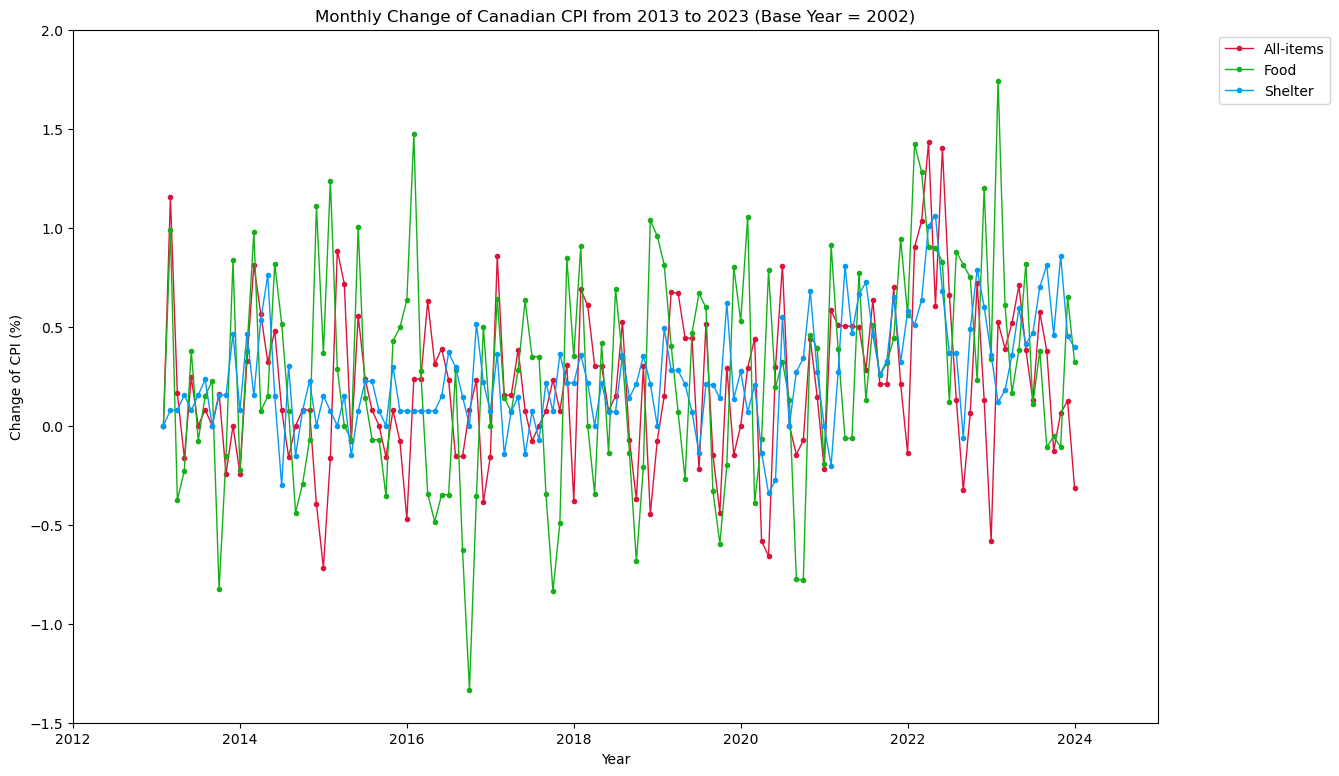

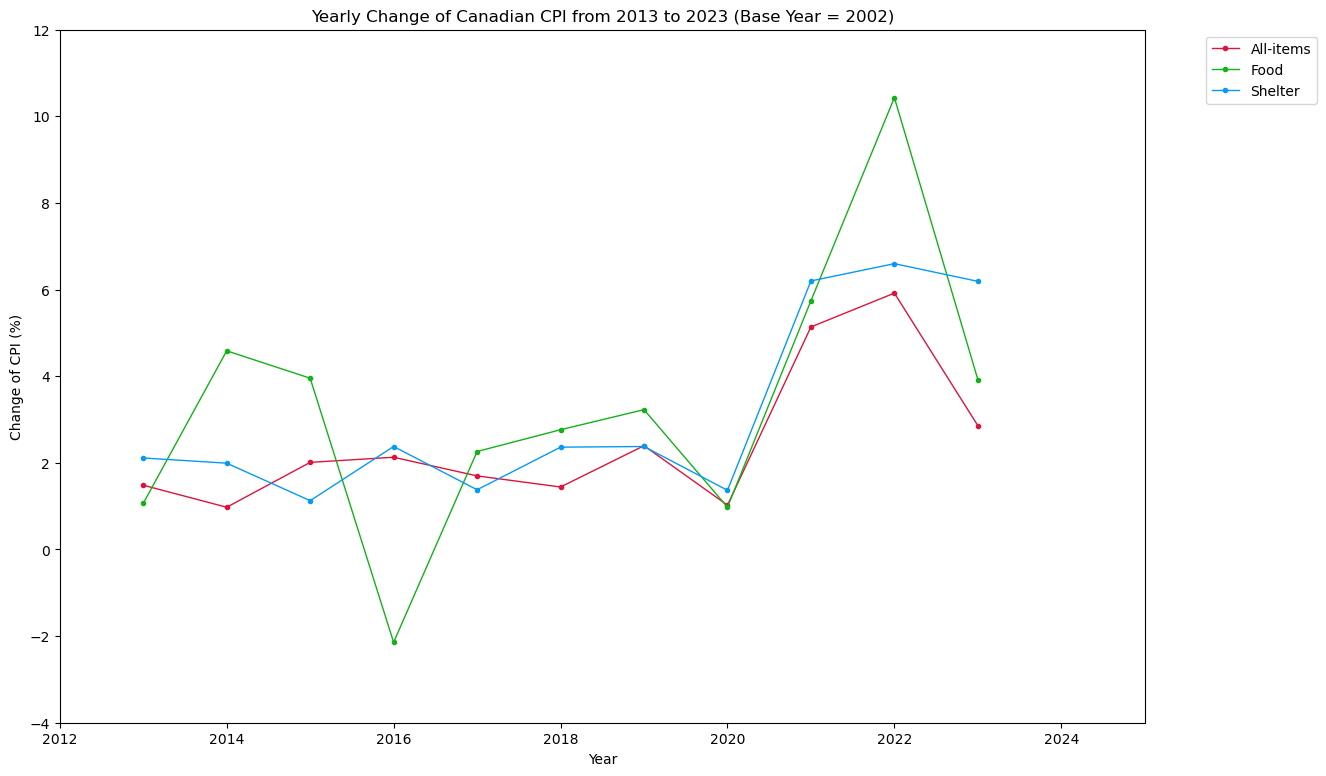

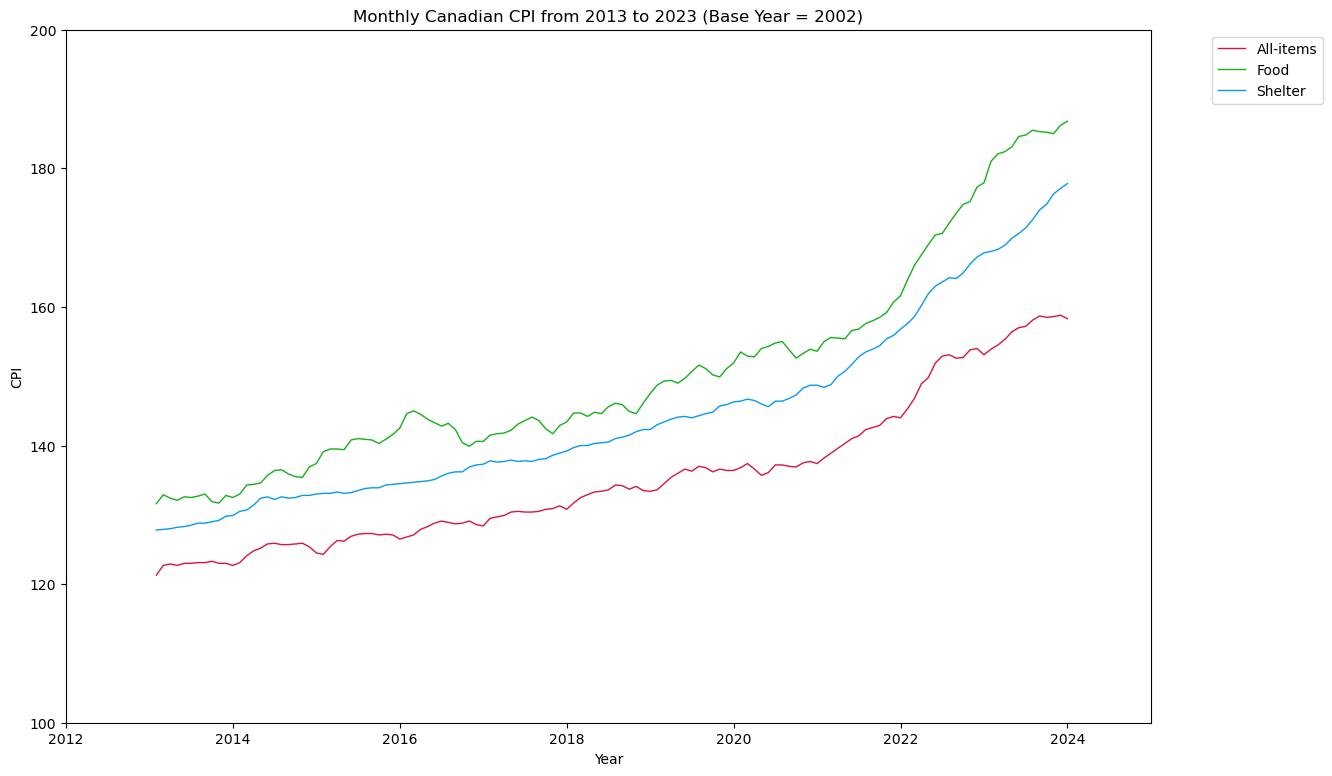

In [36]:
main("Canadian CPI cleaned.csv")

In [ ]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 130118
# Uncomment the ASSIGNMENT row for your section
# ASSIGNMENT = 1740562 #if you are in section 201
# ASSIGNMENT = 1788053 #if you are in section 202

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.